## Homework

### Dataset

In this homework, we'll build a model for predicting if we have an image of a dino or a dragon. For this, we will use the "Dino or Dragon?" dataset that can be downloaded from [Kaggle](https://www.kaggle.com/datasets/agrigorev/dino-or-dragon). 

You can get a wget-able version [here](https://github.com/alexeygrigorev/dino-or-dragon/releases/download/data/dino-dragon.zip):

```bash
wget https://github.com/alexeygrigorev/dino-or-dragon/releases/download/data/dino-dragon.zip
unzip dino-dragon.zip
```

In the lectures we saw how to use a pre-trained neural network. In the homework, we'll train a much smaller model from scratch. 

**Note:** You will need an environment with a GPU for this homework. We recommend to use [Saturn Cloud](https://bit.ly/saturn-mlzoomcamp). 
You can also use a computer without a GPU (e.g. your laptop), but it will be slower.




### Data Preparation

The dataset contains around 1900 images of dinos and around 1900 images of dragons. 

The dataset contains separate folders for training and test sets. 

In [1]:
!wget https://github.com/alexeygrigorev/dino-or-dragon/releases/download/data/dino-dragon.zip


'wget' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
!unzip dino-dragon.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img


In [4]:
path = { 'train_directory': 'train',
          'test_directory':'test'}



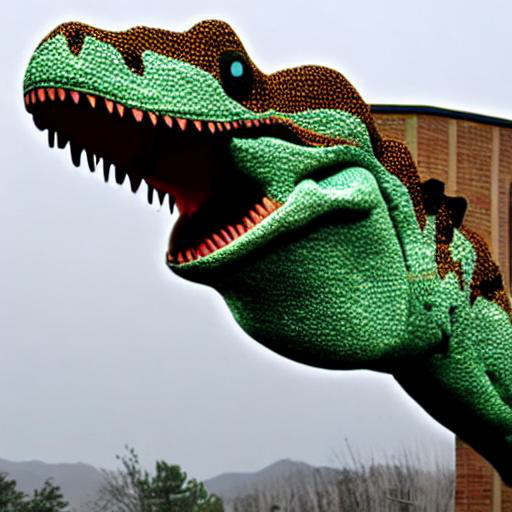

In [5]:
## Some of the images in the folder

load_img ('train/dino/1b0de9eb-3882-497d-a0be-98e5874f0ab3.jpg')

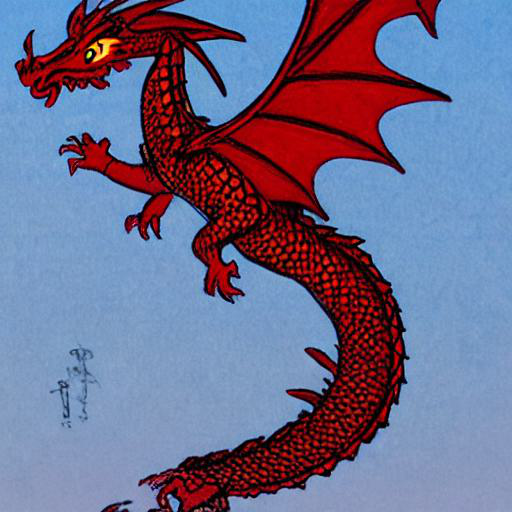

In [6]:
load_img ('train/dragon/3edfbf0c-6b14-4dfc-a034-f6fdfa86dab6.jpg')




### Model

For this homework we will use Convolutional Neural Network (CNN). Like in the lectures, we'll use Keras.

You need to develop the model with following structure:

* The shape for input should be `(150, 150, 3)`
* Next, create a convolutional layer ([`Conv2D`](https://keras.io/api/layers/convolution_layers/convolution2d/)):
    * Use 32 filters
    * Kernel size should be `(3, 3)` (that's the size of the filter)
    * Use `'relu'` as activation 
* Reduce the size of the feature map with max pooling ([`MaxPooling2D`](https://keras.io/api/layers/pooling_layers/max_pooling2d/))
    * Set the pooling size to `(2, 2)`
* Turn the multi-dimensional result into vectors using a [`Flatten`](https://keras.io/api/layers/reshaping_layers/flatten/) layer
* Next, add a `Dense` layer with 64 neurons and `'relu'` activation
* Finally, create the `Dense` layer with 1 neuron - this will be the output
    * The output layer should have an activation - use the appropriate activation for the binary classification case

As optimizer use [`SGD`](https://keras.io/api/optimizers/sgd/) with the following parameters:

* `SGD(lr=0.002, momentum=0.8)`

For clarification about kernel size and max pooling, check [Office Hours](https://www.youtube.com/watch?v=1WRgdBTUaAc).

In [7]:
target_size= 150

inputs = keras.layers.Input(shape=(target_size,target_size,3))

vector=keras.layers.Conv2D(32, (3,3), activation='relu')(inputs)
pooled_vect=keras.layers.MaxPooling2D(pool_size=(2,2))(vector)
flattend_vector=keras.layers.Flatten()(pooled_vect)

densed_output=keras.layers.Dense(64, activation='relu')(flattend_vector)

outputs = keras.layers.Dense(1 , activation='sigmoid')(densed_output)

model = keras.Model(inputs, outputs)



In [8]:
optimizer = keras.optimizers.SGD(learning_rate = 0.002,momentum=0.8)

loss=keras.losses.BinaryCrossentropy(from_logits=False)

model.compile(optimizer=optimizer, loss=loss, metrics=['acc'])






### Question 1

Since we have a binary classification problem, what is the best loss function for us?

- `binary crossentropy`
- `focal loss`
- `mean squared error`
- `categorical crossentropy`

Note: since we specify an activation for the output layer, we don't need to set `from_logits=True`


ans: binary crossentropy

### Question 2

What's the total number of parameters of the model? You can use the `summary` method for that. 

- 9215873
- 11215873
- 14215873
- 19215873

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                             

ans: Total params: 11,215,873





### Generators and Training

For the next two questions, use the following data generator for both train and test sets:

```python
ImageDataGenerator(rescale=1./255)
```

* We don't need to do any additional pre-processing for the images.
* When reading the data from train/val directories, check the `class_mode` parameter. Which value should it be for a binary classification problem?
* Use `batch_size=20`
* Use `shuffle=True` for both training and test sets. 

For training use `.fit()` with the following params:

```python
model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)
```

In [10]:
train_datagen = ImageDataGenerator(rescale = 1.0/255)

val_datagen = ImageDataGenerator(rescale = 1.0/255)

training_set = train_datagen.flow_from_directory(path["train_directory"],
                                                 target_size = (target_size,target_size),
                                                 batch_size = 20,
                                                 class_mode = 'binary',
                                                    shuffle=True)

val_set = val_datagen.flow_from_directory(path["test_directory"],
                                                 target_size = (target_size,target_size),
                                                 batch_size = 20,
                                                 class_mode = 'binary',
                                                 shuffle=True)

Found 1594 images belonging to 2 classes.
Found 394 images belonging to 2 classes.


In [11]:
training_set.class_indices

{'dino': 0, 'dragon': 1}

In [12]:
history=model.fit(
    training_set,
    epochs=10,
    validation_data=val_set
)

Epoch 1/10
80/80 [==============================] - 59s 688ms/step - loss: 0.6515 - acc: 0.6317 - val_loss: 0.5638 - val_acc: 0.7690
Epoch 2/10
80/80 [==============================] - 27s 341ms/step - loss: 0.5241 - acc: 0.7635 - val_loss: 0.4537 - val_acc: 0.8223
Epoch 3/10
80/80 [==============================] - 28s 347ms/step - loss: 0.4301 - acc: 0.8193 - val_loss: 0.3933 - val_acc: 0.8528
Epoch 4/10
80/80 [==============================] - 27s 342ms/step - loss: 0.3890 - acc: 0.8275 - val_loss: 0.3565 - val_acc: 0.8579
Epoch 5/10
80/80 [==============================] - 28s 344ms/step - loss: 0.3159 - acc: 0.8789 - val_loss: 0.3342 - val_acc: 0.8655
Epoch 6/10
80/80 [==============================] - 27s 340ms/step - loss: 0.3011 - acc: 0.8777 - val_loss: 0.3117 - val_acc: 0.8782
Epoch 7/10
80/80 [==============================] - 28s 344ms/step - loss: 0.2869 - acc: 0.8777 - val_loss: 0.4618 - val_acc: 0.7817
Epoch 8/10
80/80 [==============================] - 28s 348ms/step - 

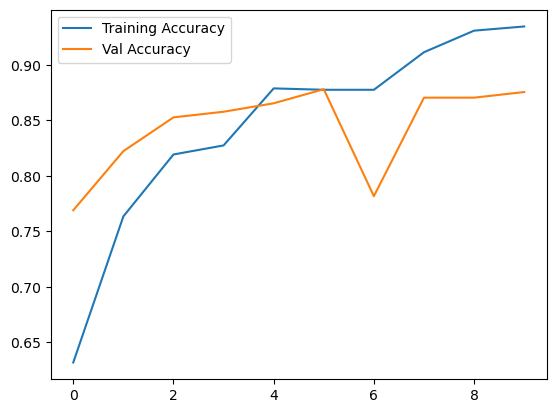

In [16]:
plt.plot(history.history['acc'] , label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Val Accuracy')

plt.legend()
plt.show()





### Question 3

What is the median of training accuracy for all the epochs for this model?

- 0.40
- 0.60
- 0.90
- 0.20

In [18]:
np.median(history.history['acc'])

0.8776662349700928

ans:0.90



### Question 4

What is the standard deviation of training loss for all the epochs for this model?

- 0.11
- 0.66
- 0.99
- 0.33


In [20]:
np.std(history.history['loss'])

0.14093272773732526

ans: 0.11



### Data Augmentation

For the next two questions, we'll generate more data using data augmentations. 

Add the following augmentations to your training data generator:

* `rotation_range=40,`
* `width_shift_range=0.2,`
* `height_shift_range=0.2,`
* `shear_range=0.2,`
* `zoom_range=0.2,`
* `horizontal_flip=True,`
* `fill_mode='nearest'`

In [21]:
train_datagen = ImageDataGenerator(rescale = 1.0/255 ,
                                   rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest'
                                  )

val_datagen = ImageDataGenerator(rescale = 1.0/255)

training_set = train_datagen.flow_from_directory(path["train_directory"],
                                                 target_size = (target_size,target_size),
                                                 batch_size = 20,
                                                 class_mode = 'binary',
                                                    shuffle=True)

val_set = val_datagen.flow_from_directory(path["test_directory"],
                                                 target_size = (target_size,target_size),
                                                 batch_size = 20,
                                                 class_mode = 'binary',
                                                 shuffle=True)

Found 1594 images belonging to 2 classes.
Found 394 images belonging to 2 classes.


In [22]:
history=model.fit(
    training_set,
    epochs=10,
    validation_data=val_set
)

Epoch 1/10
80/80 [==============================] - 73s 918ms/step - loss: 0.4564 - acc: 0.7936 - val_loss: 0.3246 - val_acc: 0.8579
Epoch 2/10
80/80 [==============================] - 41s 514ms/step - loss: 0.4133 - acc: 0.8099 - val_loss: 0.3592 - val_acc: 0.8376
Epoch 3/10
80/80 [==============================] - 41s 511ms/step - loss: 0.4135 - acc: 0.8143 - val_loss: 0.2981 - val_acc: 0.8604
Epoch 4/10
80/80 [==============================] - 39s 484ms/step - loss: 0.3924 - acc: 0.8168 - val_loss: 0.3673 - val_acc: 0.8249
Epoch 5/10
80/80 [==============================] - 38s 475ms/step - loss: 0.3999 - acc: 0.8093 - val_loss: 0.2873 - val_acc: 0.8655
Epoch 6/10
80/80 [==============================] - 39s 491ms/step - loss: 0.3921 - acc: 0.8250 - val_loss: 0.5963 - val_acc: 0.7132
Epoch 7/10
80/80 [==============================] - 38s 478ms/step - loss: 0.3784 - acc: 0.8306 - val_loss: 0.3898 - val_acc: 0.8401
Epoch 8/10
80/80 [==============================] - 39s 484ms/step - 

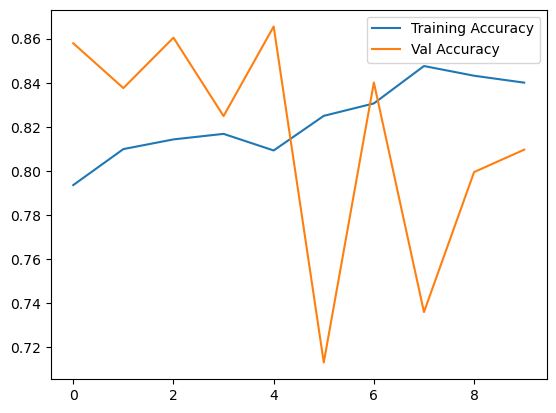

In [23]:
plt.plot(history.history['acc'] , label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Val Accuracy')

plt.legend()
plt.show()



### Question 5 

Let's train our model for 10 more epochs using the same code as previously.
Make sure you don't re-create the model - we want to continue training the model
we already started training.

What is the mean of test loss for all the epochs for the model trained with augmentations?

- 0.15
- 0.77
- 0.37
- 0.97



In [24]:
np.mean(history.history['val_loss'])

0.4217563271522522

ans: 0.37


### Question 6

What's the average of test accuracy for the last 5 epochs (from 6 to 10)
for the model trained with augmentations?

- 0.84
- 0.54
- 0.44
- 0.24


In [25]:
np.mean(history.history['val_acc'][6:])

0.7963197976350784

ans: 0.84


## Submit the results

- Submit your results here: https://forms.gle/XdH5ztBddvTvxzpT6
- You can submit your solution multiple times. In this case, only the last submission will be used
- If your answer doesn't match options exactly, select the closest one


## Deadline

The deadline for submitting is 21 November 2022, 23:00 CEST.

After that, the form will be closed.